#Projeto Ciência de Dados - Previsão de Vendas
#Utilizando

-Desafio: Conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa 
investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entender a Premissa
- Passo 2: Entendimento da Área de Negócio
- Passo 3: Extração/Obtenção de Dados das Fontes
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória (Passo Natural e Instintivo)
- Passo 6: Modelagem + Algoritmos (Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados (Parte do próprio Analista)

#### Importar a Base de dados

In [ ]:
#Importando o pandas
import pandas as pd

#Lendo o arquivo csv
df = pd.read_csv("/content/advertising.csv")
display(df)

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

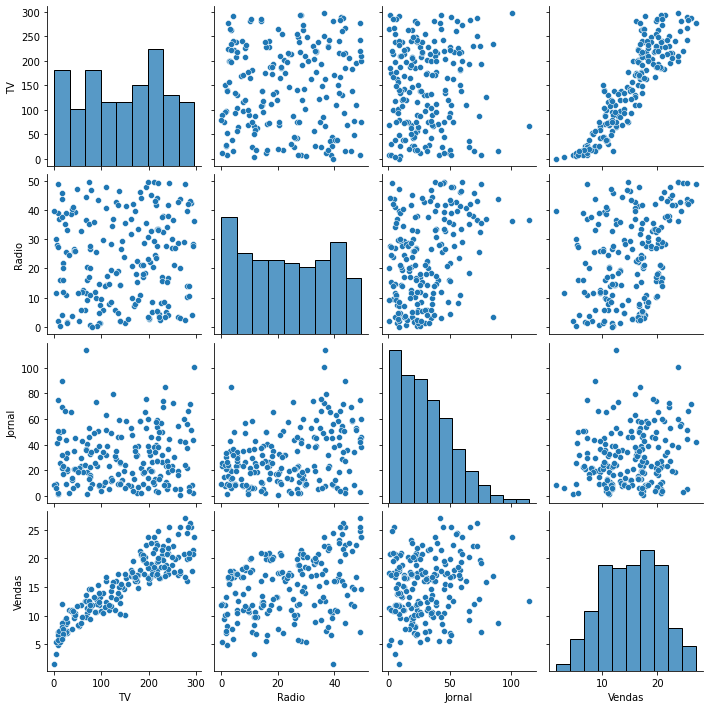

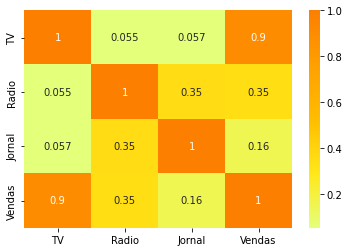

In [15]:
#Importando o seaborn e o matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

#Gráfico pairplot
sns.pairplot(df)
plt.show()

#Gráfico Heatmap
sns.heatmap(df.corr(), cmap ='Wistia', annot =True)
plt.show()

####Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste
- Dessa vez vamos utilizar 70/30

In [3]:
from sklearn.model_selection import train_test_split
x = df.drop('Vendas', axis=1)
y = df['Vendas']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

####Quando temos volumes e dados temporais/sazionais

####Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

#treino AI
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

####Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [18]:
#teste AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
mse_lin = metrics.mean_squared_error(y_test, test_pred_lin)
print(f"R² da Regressão Linear: {r2_lin}")
print(f"MSE da Regressão Linear: {mse_lin}")
r2_rf= metrics.r2_score(y_test, test_pred_rf)
mse_rf = metrics.mean_squared_error(y_test, test_pred_rf)
print(f"R² do Random Forest: {r2_rf}")
print(f"MSE do Random Forest: {mse_rf}")

R² da Regressão Linear: 0.9071151423684273
MSE da Regressão Linear: 2.370659971225658
R² do Random Forest: 0.9651118428527955
MSE do Random Forest: 0.8904353166666693


####Visualização Gráfica das Previsões

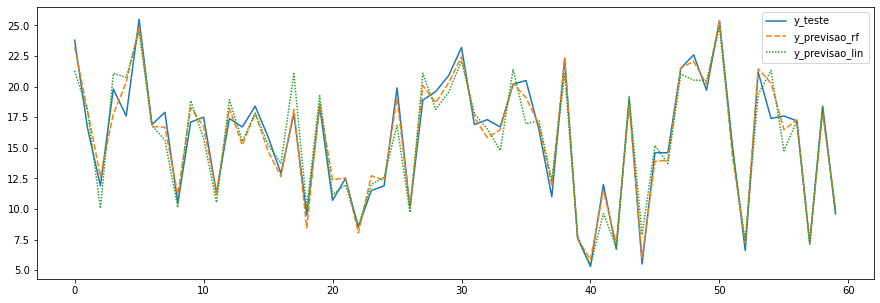

,y_teste,y_previsao_rf,y_previsao_lin
0,23.8,23.231,21.288161
1,16.6,18.078,18.042132
2,11.9,12.640,10.059590
3,19.8,17.754,21.082241
4,17.6,20.350,20.764760
5,25.5,24.875,24.471874
6,16.9,16.745,16.806436
7,17.9,16.682,15.628857
8,10.5,11.198,10.124799
9,17.1,18.285,18.846019


In [19]:
df_resultado = pd.DataFrame()
#df_resultado.index = x_test
df_resultado['y_teste'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
#display(df_resultado)
df_resultado = df_resultado.reset_index(drop=True)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)

####Qual a importância de cada variável para as vendas?

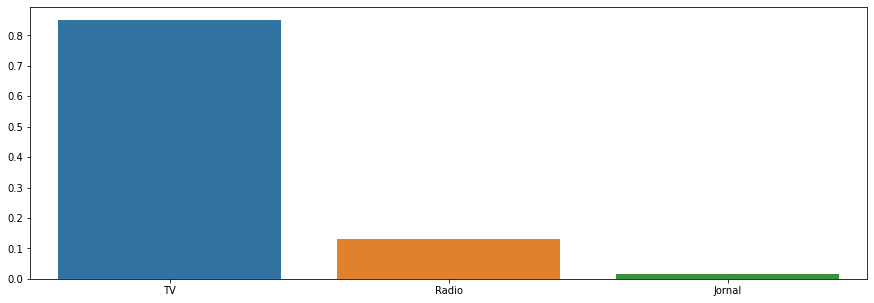

In [20]:
#importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
plt.figure(figsize=(15, 5))
sns.barplot(x=x_train.columns, y=rf_reg.feature_importances_)
plt.show()

####Será que estamos investindo certo?

In [8]:
print(df[["Radio", "Jornal"]].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64
